In [1]:
#Exporting libraries for reading and analysing data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
#Files
import os
for dirname, _, filenames in os.walk("original_data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

original_data/test.csv
original_data/train.csv
original_data/gender_submission.csv


In [3]:
#Data reading
data = pd.read_csv("original_data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()
#Also:
#data.columns
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Sex', ylabel='count'>

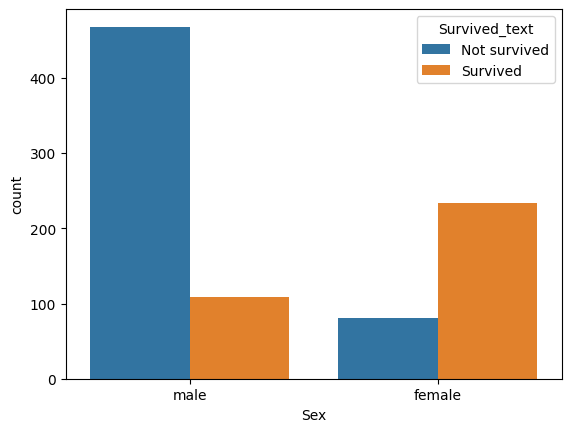

In [5]:
#Survived vs sex vs count
# Create a new column indicating if the passenger survived or not
data['Survived_text'] = data['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not survived')

# Create the bar plot
sns.countplot(x='Sex', hue='Survived_text', data=data)


<Axes: xlabel='Pclass', ylabel='Survived'>

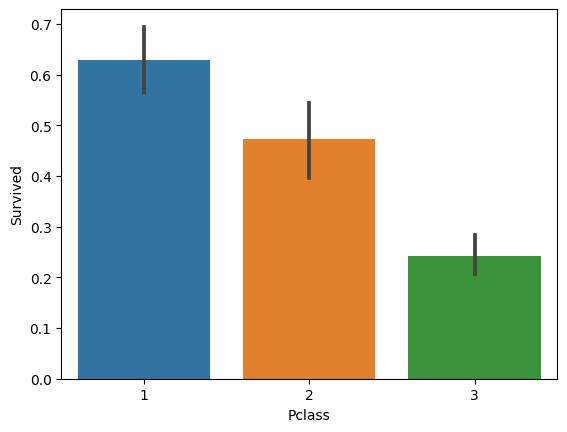

In [6]:
sns.barplot(x="Pclass", y="Survived", data=data)

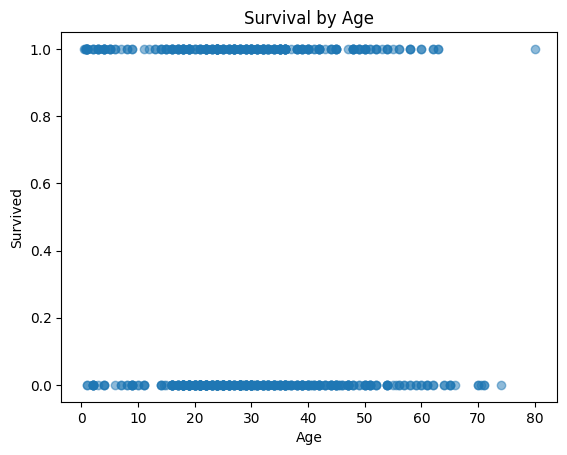

In [7]:
plt.scatter(data["Age"], data["Survived"], alpha=0.5)
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

<Axes: xlabel='Age', ylabel='Sex'>

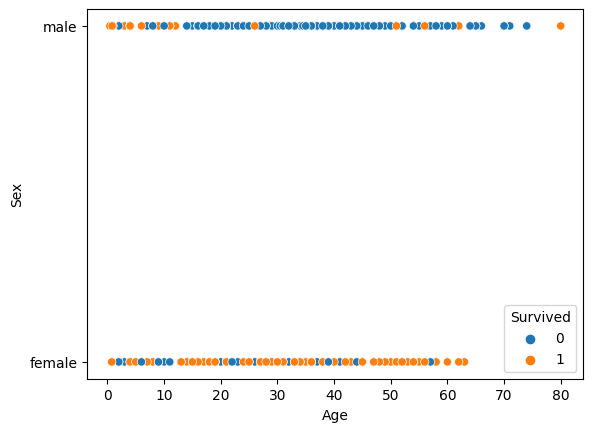

In [8]:
#Survival by age & sex
sns.scatterplot(x="Age", y="Sex", hue="Survived", data=data)
#Little boys survived!

<Axes: ylabel='Frequency'>

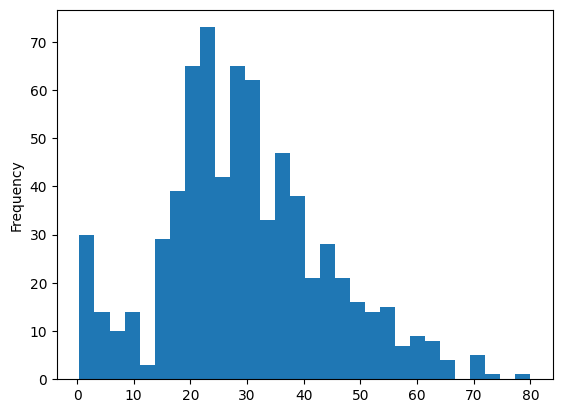

In [9]:
#What age we have?
data['Age'].dropna().plot.hist(bins=30)

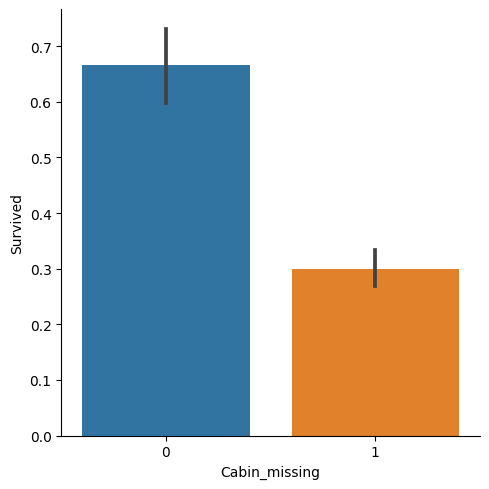

In [10]:
#Checking Cabin column: does its luck mean much?
data["Cabin_missing"] = data["Cabin"].isna().astype(int)
sns.catplot(x="Cabin_missing", y="Survived", data=data, kind="bar")

<Axes: xlabel='Embarked', ylabel='Survived'>

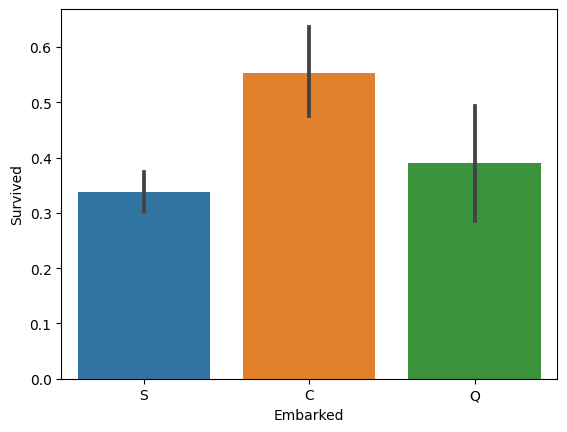

In [11]:
#Checking ports
sns.barplot(x="Embarked", y="Survived", data=data)

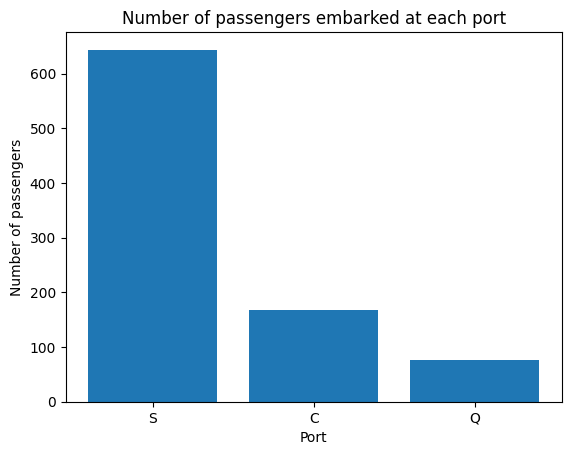

In [12]:
embarked_counts = data["Embarked"].value_counts()

plt.bar(embarked_counts.index, embarked_counts.values)
plt.title("Number of passengers embarked at each port")
plt.xlabel("Port")
plt.ylabel("Number of passengers")
plt.show()

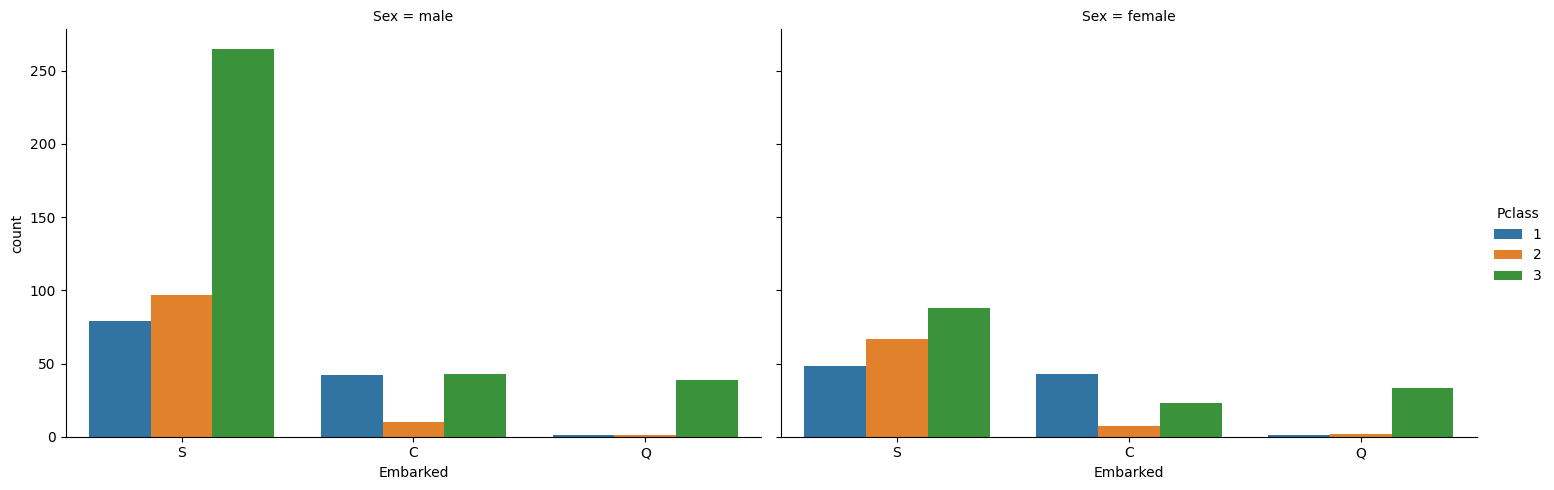

In [13]:
#Checking survival & port & sex
sns.catplot(x="Embarked", hue="Pclass", col="Sex", data=data, kind="count", height=5, aspect =1.5)

So, 
S - "working port". Lots of men of 3 class -> died. 0.3 survived. 

C - "elite port" - 0.6 survived.

Q - "a little working port". 0.4 survived.

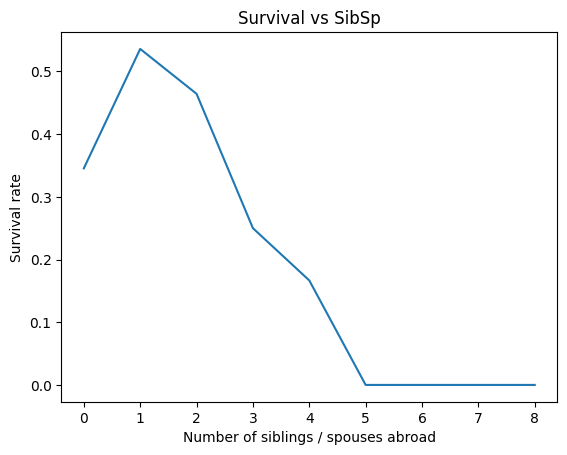

In [14]:
#Group the data by SibSp and calculate the survival rate
sibsp_survival = data.groupby(["SibSp"])["Survived"].mean().reset_index()

#Plot the data 
sns.lineplot(x="SibSp", y="Survived", data=sibsp_survival)
plt.title("Survival vs SibSp")
plt.xlabel("Number of siblings / spouses abroad")
plt.ylabel("Survival rate")
plt.show()

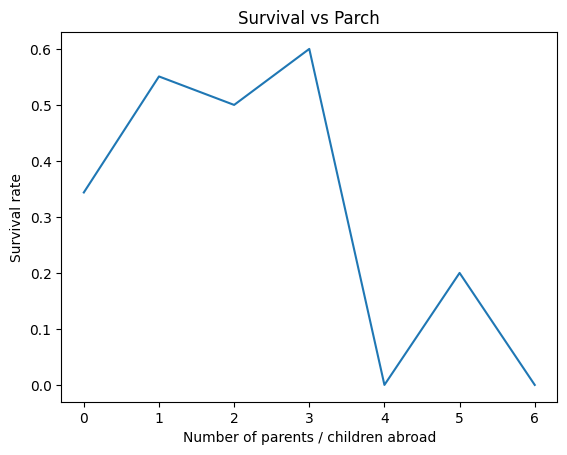

In [15]:
#Group the data by Parch and calculate the survival rate
sibsp_survival = data.groupby(["Parch"])["Survived"].mean().reset_index()

#Plot the data 
sns.lineplot(x="Parch", y="Survived", data=sibsp_survival)
plt.title("Survival vs Parch")
plt.xlabel("Number of parents / children abroad")
plt.ylabel("Survival rate")
plt.show()

In [16]:
#Checking whether the problem is that data is small:
for i in range (0, 7):
    parch_number = data[data["Parch"] == i]
    survived_parch_number = parch_number["Survived"].sum()
    print(f"Number of people who had {i} parents or children and survived: {survived_parch_number}")

Number of people who had 0 parents or children and survived: 233
Number of people who had 1 parents or children and survived: 65
Number of people who had 2 parents or children and survived: 40
Number of people who had 3 parents or children and survived: 3
Number of people who had 4 parents or children and survived: 0
Number of people who had 5 parents or children and survived: 1
Number of people who had 6 parents or children and survived: 0


Yes, the data is too small.